# Goals

- Confirm that test is actually negative. I.e., the old version of the site with just one translation across Spain and LatAm performs better

- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and results can be trusted.

## Problem 1 & 2

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

# Load dataset

In [2]:
user = pd.read_csv('/Users/lyndon/Documents/GitHub/DS_dc_data/Translation_Test/user_table.csv')
test = pd.read_csv('/Users/lyndon/Documents/GitHub/DS_dc_data/Translation_Test/test_table.csv')

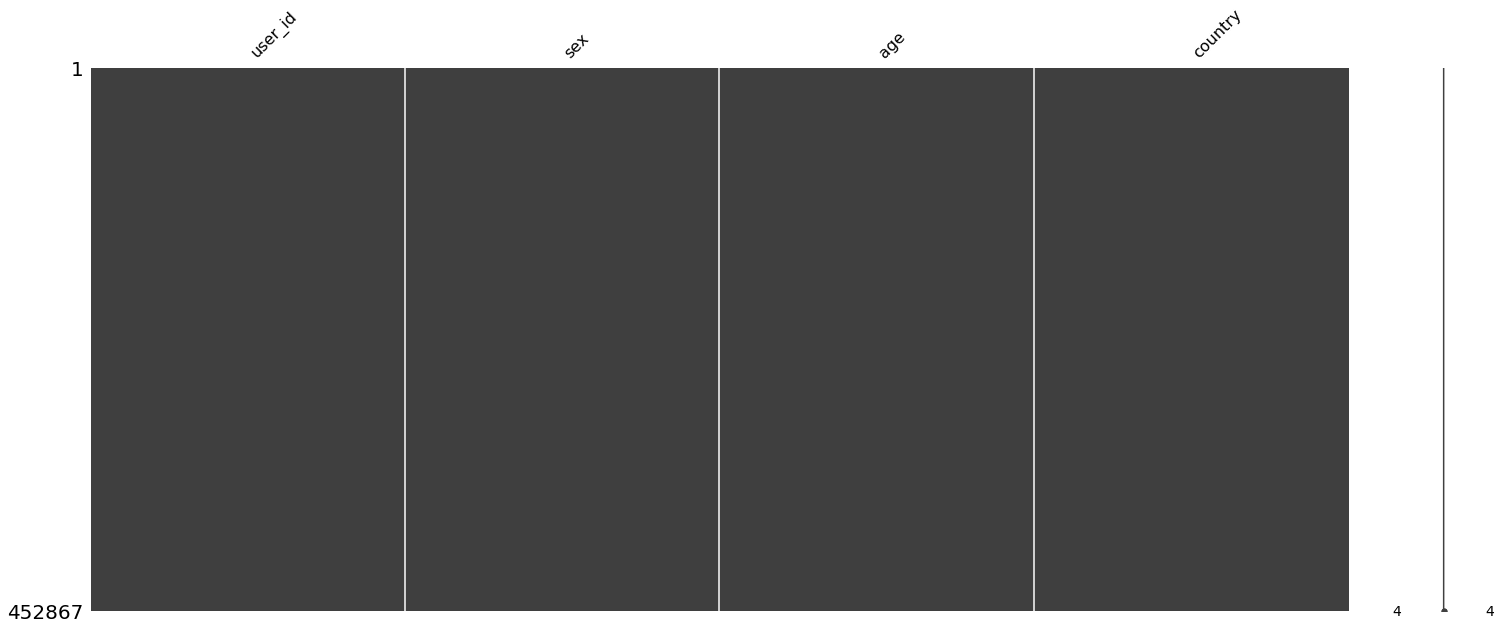

In [3]:
msno.matrix(user)

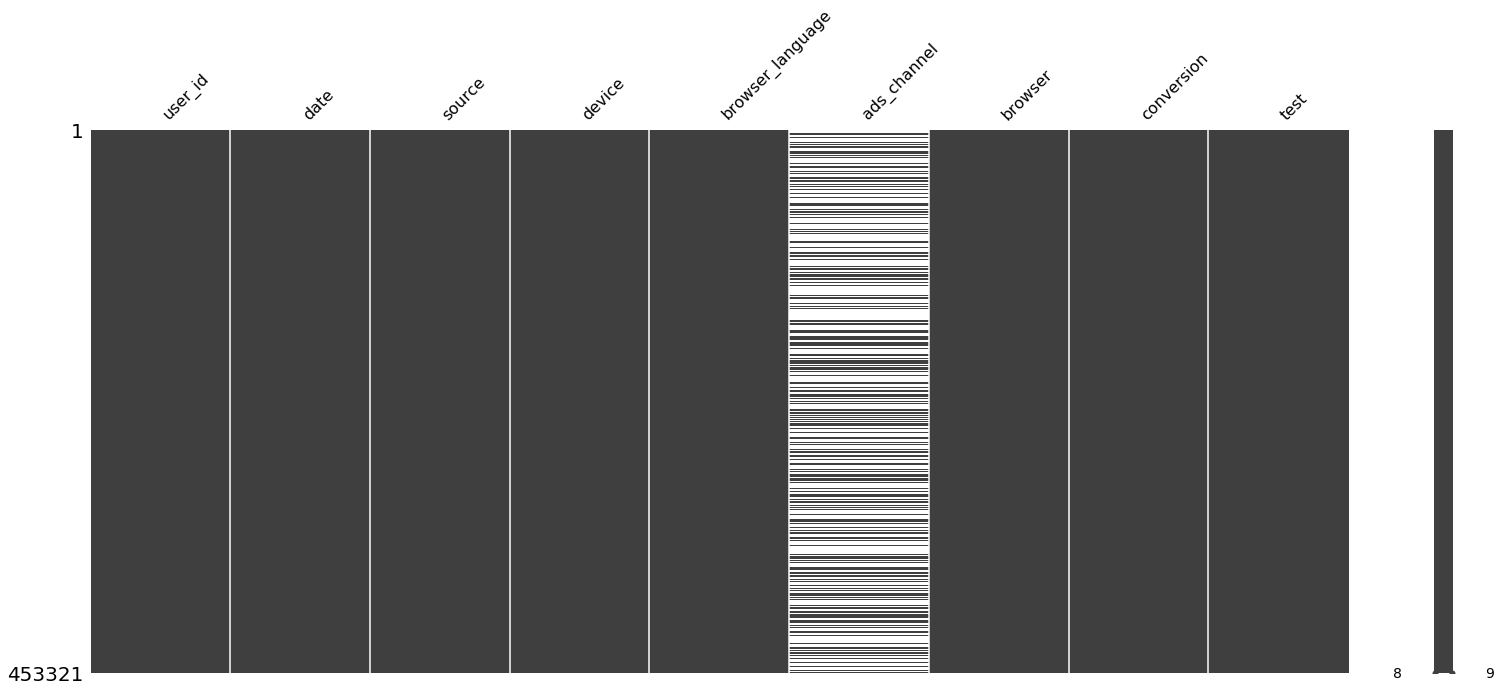

In [4]:
msno.matrix(test)

### Inspect dataset

In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [6]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
# check if there is duplicates
user.duplicated(subset='user_id').sum()

0

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


Notice: There are lot of missing values in ads_channel, which need to be explored more afterwards

In [9]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [10]:
# check if there is duplicates
test.duplicated(subset='user_id').sum()

0

Notice that, number of user in the user dataset is less than the test.  However, since the difference is very little, we could ignore and simply drop these records once combined

# Data Processing

In [3]:
# Combine two tables
df = test.merge(user, how='left',on='user_id').dropna(subset=['user_id'])
# convert date to datetime obj
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.isna().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [17]:
df[df['ads_channel'].isna()]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22.0,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
11,73335,2015-12-03,SEO,Web,ES,NaN,IE,0,1,F,29.0,Uruguay
12,744811,2015-12-01,SEO,Mobile,ES,NaN,Android_App,1,0,F,32.0,Spain
13,234023,2015-12-03,SEO,Web,ES,NaN,Chrome,0,0,F,19.0,El Salvador
15,103879,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0,M,27.0,Nicaragua
16,409295,2015-12-02,Direct,Web,ES,NaN,FireFox,0,1,M,22.0,Nicaragua


In [14]:
df[df['country'].isna()]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
819,657841,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,NaN,NaN,NaN
1696,859340,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0,NaN,NaN,NaN
1934,716487,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN
2409,87209,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0,NaN,NaN,NaN
2721,771642,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN
5042,775332,2015-12-04,SEO,Web,EN,NaN,IE,0,0,NaN,NaN,NaN
7552,728692,2015-12-03,SEO,Web,ES,NaN,Safari,0,0,NaN,NaN,NaN
7855,201405,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,NaN,NaN,NaN
8930,895987,2015-12-02,SEO,Web,ES,NaN,Chrome,0,0,NaN,NaN,NaN
9082,199006,2015-12-04,Direct,Web,EN,NaN,Chrome,0,0,NaN,NaN,NaN


In [15]:
df.describe(include='all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000,452867,452867.000000,452867
unique,NaN,5,3,2,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2015-12-04 00:00:00,Ads,Web,ES,Facebook,Android_App,NaN,NaN,M,NaN,Mexico
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN,264485,NaN,128484
first,NaN,2015-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446,NaN,27.130740,NaN
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445,NaN,6.776678,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN


In [16]:
df.query('test==0')['country'].value_counts()

Mexico         64209
Spain          51782
Colombia       27088
Peru           16869
Venezuela      16149
Chile           9853
Argentina       9356
Ecuador         8036
Guatemala       7622
Bolivia         5550
Honduras        4361
El Salvador     4108
Paraguay        3650
Nicaragua       3419
Costa Rica      2660
Panama          1966
Uruguay          415
Name: country, dtype: int64

In [17]:
df.query('test==1')['country'].value_counts()

Mexico         64275
Argentina      37377
Colombia       26972
Peru           16797
Venezuela      15905
Chile           9884
Ecuador         7859
Guatemala       7503
Bolivia         5574
Honduras        4207
El Salvador     4067
Uruguay         3719
Paraguay        3697
Nicaragua       3304
Costa Rica      2649
Panama          1985
Name: country, dtype: int64

In [18]:
# conversion of spain and other countries
df.groupby('country')['conversion'].mean().sort_values(ascending=False)

country
Spain          0.079719
Costa Rica     0.053494
Nicaragua      0.053399
Colombia       0.051332
El Salvador    0.050765
Mexico         0.050341
Peru           0.050258
Chile          0.049704
Venezuela      0.049666
Guatemala      0.049653
Honduras       0.049253
Ecuador        0.049072
Paraguay       0.048863
Bolivia        0.048634
Panama         0.048089
Argentina      0.013994
Uruguay        0.012821
Name: conversion, dtype: float64

Spain is really higher than other countries

In [5]:
# remove Spain from the dataset since the A/B testing is performed on countries other than Spain
df = df[df['country']!='Spain']

In [6]:
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


In [7]:
df.groupby('test')['conversion'].mean()

test
0    0.048330
1    0.043425
Name: conversion, dtype: float64

In [8]:
res1 = df.groupby(['country','test'])[['conversion']].mean().reset_index().pivot_table(index='country',columns='test',values='conversion')
res1

test,0,1
country,,
Argentina,0.015071,0.013725
Bolivia,0.049369,0.047901
Chile,0.048107,0.051295
Colombia,0.052089,0.050571
Costa Rica,0.052256,0.054738
Ecuador,0.049154,0.048988
El Salvador,0.053554,0.047947
Guatemala,0.050643,0.048647
Honduras,0.050906,0.047540


In [9]:
# perform two sample t-test to see if the test group is performing better than control
stats.ttest_ind(df[df['test']==1]['conversion'],df[df['test']==0]['conversion'], equal_var=False)

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)

### Observation 0:
It seems that control group is doing better than the testing group, which is not expected.  Let's see if there is any problem in the test.  Since A/B testing requires almost same distribution of other variables in both control and test group to satisfy the randomness, next step will be checking the randomness.

Use visz to check

In [24]:
df.columns

Index(['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'conversion', 'test', 'sex', 'age',
       'country'],
      dtype='object')

In [25]:
cols = ['source', 'device', 'browser_language',
       'ads_channel', 'browser', 'sex', 'age',
       'country']

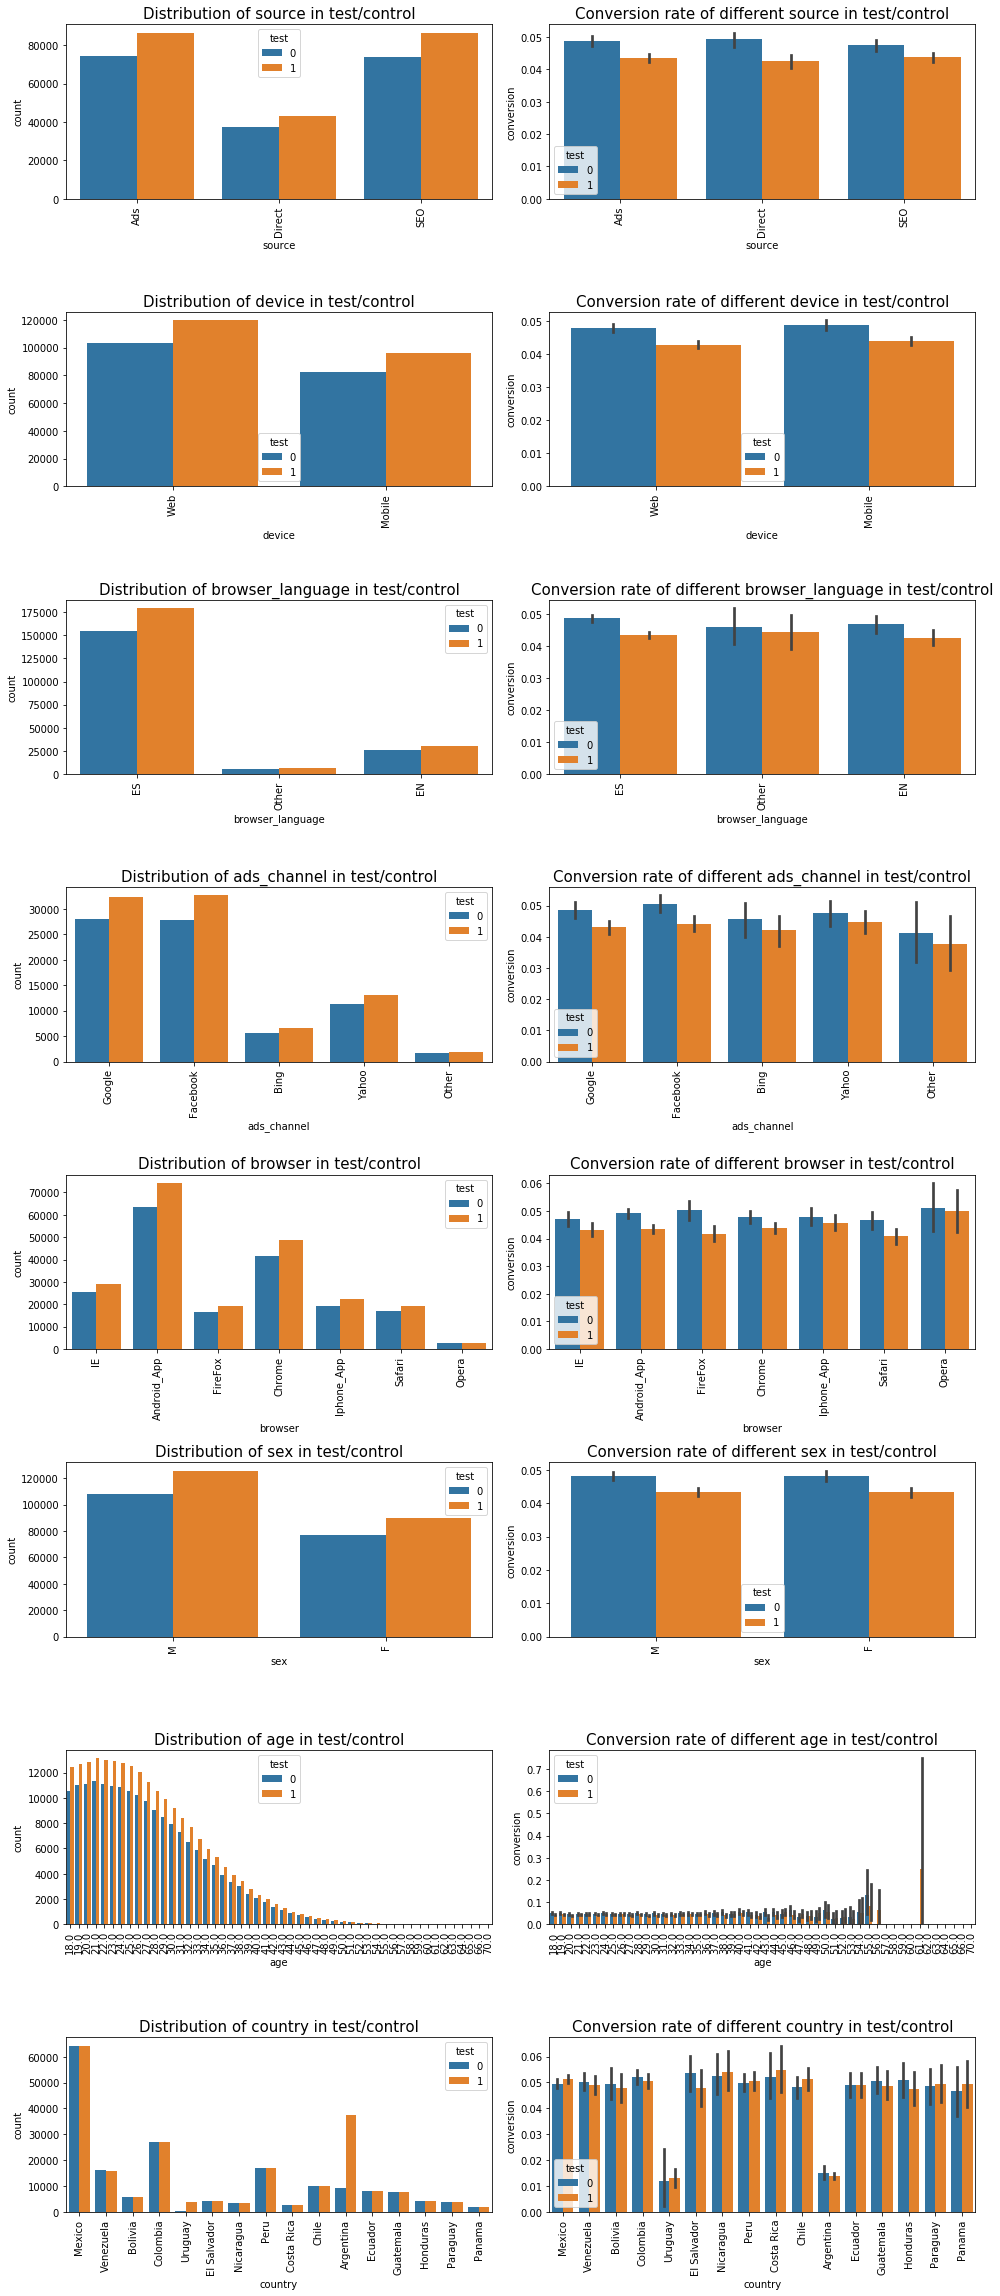

In [103]:
fig, ax = plt.subplots(nrows=len(cols), ncols=2, figsize=(14,32))
for i, col in enumerate(cols):
    sns.countplot(col,data=df,hue='test',ax=ax[i,0])
    ax[i,0].set_title('Distribution of '+col+' in test/control',fontsize=15)
    ax[i,0].set_xticklabels(ax[i,0].get_xticklabels(), rotation=90)
    
    sns.barplot(x=col,y='conversion', data=df,hue='test',ax=ax[i,1])
    ax[i,1].set_title('Conversion rate of different '+col+' in test/control',fontsize=15)
    ax[i,1].set_xticklabels(ax[i,1].get_xticklabels(), rotation=90)    
    plt.tight_layout()

### Observation 1:
From the charts, we can see the sample sizes of some groups have huge difference.  Let's see how much they are different between control and test 

In [26]:
_=df.groupby(['age','test'])[['user_id']].nunique().reset_index().groupby('age').apply(lambda x:((x[x['test']==1]['user_id']).values-(x[x['test']==0]['user_id']).values)).map(lambda x:int(x) if len(x)==1 else np.nan)


In [27]:
df.groupby(['age','test'])[['user_id']].nunique().reset_index()['user_id'].quantile(0.25)

81.75

In [28]:
df.groupby(['age','test'])[['user_id']].nunique().reset_index().groupby('age').get_group(18)

,age,test,user_id
0,18.0,0,10556
1,18.0,1,12412


In [29]:
def inspect_dif(col,base=1):
    ((df.groupby([col,'test'])[['user_id']].nunique().reset_index().set_index(col)[['user_id']][1-base::2]-\
df.groupby([col,'test'])[['user_id']].nunique().reset_index().set_index(col)[['user_id']][base::2])/\
df.groupby([col,'test'])[['user_id']].nunique().reset_index().set_index(col)[['user_id']][base::2]).plot(kind='bar')

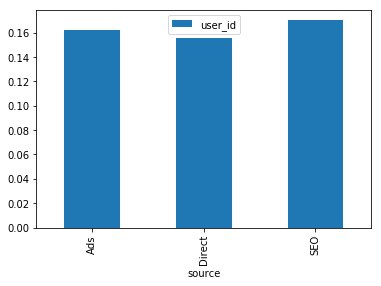

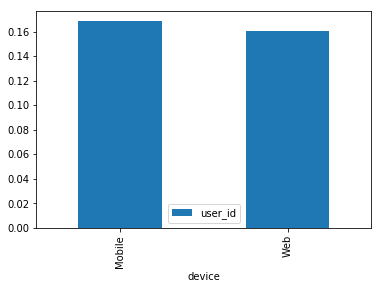

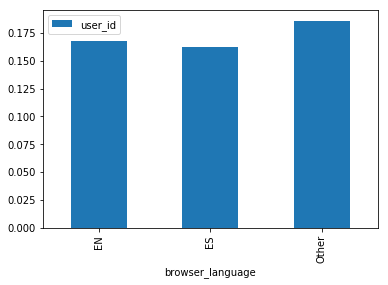

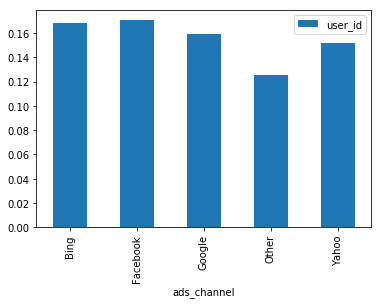

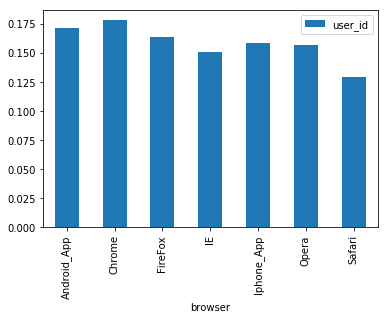

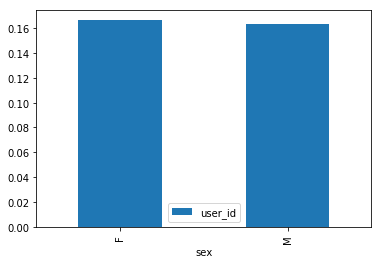

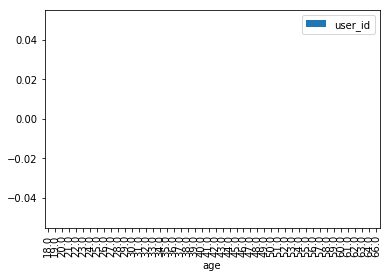

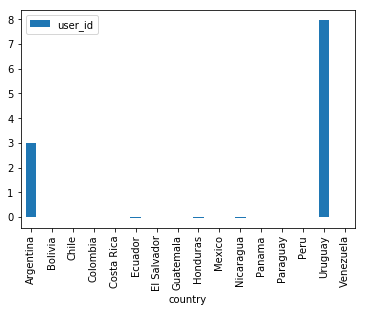

In [39]:
for col in cols:
    inspect_dif(col,0)

### Observation 2:
Difference between groups is usually 15%, however, there is huge difference in country 'Argentina' and 'Uruguay'.  It might be the problem which makes the control group seems performing better than the test.  Let's get rid of them and see the result.

In [14]:
# get rid of "A" and "U"
df1 = df[~df['country'].isin(['Argentina','Uruguay'])]
df1.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


In [15]:
# perform the two sample t test again without "A" and "U"
stats.ttest_ind(df1[df1['test']==1]['conversion'],df1[df1['test']==0]['conversion'], equal_var=False)

Ttest_indResult(statistic=0.31809948911634467, pvalue=0.750409660579713)

### Observation 3:
The pvalue indicates the result is not significant, which means we don't have strong evidence to reject the nul hypothesis, thus we could not say the control group is doing better than test group

## See the result after controling country as well

In [10]:
df3=df.dropna(subset=['country'])

In [11]:
test_conv = df3.groupby('country')[['conversion']].agg(lambda x:x[df3['test']==1].mean())
control_conv = df3.groupby('country')[['conversion']].agg(lambda x:x[df3['test']==0].mean())

In [12]:
res1 = test_conv.reset_index().merge(control_conv.reset_index(),on='country',suffixes=('_test','_control'))

In [13]:
p_values=[]
for country in res1['country'].unique().tolist():
    p_values.append(stats.ttest_ind(df3[(df3['country']==country) & (df3['test']==1)]['conversion'],\
                                   df3[(df3['country']==country) & (df3['test']==0)]['conversion'], equal_var=False)[1])

In [14]:
res1['p_value']=p_values
res1.sort_values(by='p_value')

,country,conversion_test,conversion_control,p_value
9,Mexico,0.051186,0.049495,0.165544
6,El Salvador,0.047947,0.053554,0.248127
2,Chile,0.051295,0.048107,0.302848
0,Argentina,0.013725,0.015071,0.335147
3,Colombia,0.050571,0.052089,0.423719
8,Honduras,0.047540,0.050906,0.471463
7,Guatemala,0.048647,0.050643,0.572107
15,Venezuela,0.048978,0.050344,0.573702
4,Costa Rica,0.054738,0.052256,0.687876
11,Panama,0.049370,0.046796,0.705327


### Observation 4:
After controling the country, the result shows non-significant, which means we don't have strong evidence to say localized version is worse.

## Answer to Problem 1 & 2:
We can not confirm that the test result is negative because there is some problem in spliting test/control group.
The reason might lay in randomness in choosing samples

## Problem 3

Since there are not many features in this dataset, we could use visulization to directly see the result.  However, if there are more features, it's time consuming to do that.  So it's a good practise to use machine learning here(if the model can acurately classify which group a user is in(test or control), then there might be some problems in the randomness of choosing samples)

Since we want to know which feature might cause the problem, decission tree is a good choice here

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO  
from graphviz import Source

In [42]:
dt = DecisionTreeClassifier(class_weight="balanced",min_impurity_decrease = 0.001)

In [17]:
# clean the dataset for training
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


In [18]:
# do not use ads_channel
df4 = df.drop('ads_channel', axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401539 entries, 1 to 453320
Data columns (total 11 columns):
user_id             401539 non-null int64
date                401539 non-null datetime64[ns]
source              401539 non-null object
device              401539 non-null object
browser_language    401539 non-null object
browser             401539 non-null object
conversion          401539 non-null int64
test                401539 non-null int64
sex                 401085 non-null object
age                 401085 non-null float64
country             401085 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 36.8+ MB


In [19]:
# convert date to str to get dummies(since there is only 5 day)
df4['date'] = df4['date'].astype(str)

In [20]:
# fillna value use mean for age, most common class for country and sex
df4['age'].fillna(df4['age'].mean(),inplace=True)
df4['sex'].fillna('M',inplace=True)
df4['country'].fillna('Mexico',inplace=True)

In [21]:
df4.columns

Index(['user_id', 'date', 'source', 'device', 'browser_language', 'browser',
       'conversion', 'test', 'sex', 'age', 'country'],
      dtype='object')

In [30]:
# define X and y
x_col = ['date', 'source', 'device', 'browser_language', 'browser','sex', 'age', 'country']
y_col = ['test']
X = pd.get_dummies(df4[x_col])
y = df4[y_col]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=47)

In [45]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred = dt.predict(X_test)

In [47]:
c = confusion_matrix(y_test, y_pred)

In [48]:
print('Accuracy of this Decision Tree is: '+ str((c[0,0]+c[1,1])/c.sum().sum()))
print('Baseline of the test is: '+ str(y_test.mean()))

Accuracy of this Decision Tree is: 0.5401205359366439
Baseline of the test is: test    0.537395
dtype: float64


### Observation 5:
The decission tree classifier without any parameter tunning could beat the baseline accuracy, which means that there is indeed certain pattern in the features that could determine if a user is in test group or control group. Let's see how the decission tree splits

In [50]:
# create pdf to see the result
export_graphviz(dt, out_file="dt.dot", feature_names=X.columns, proportion=True)
with open("dt.dot") as f:
    dot_graph = f.read()
s = Source.from_file("dt.dot")
s.view()

'dt.dot.pdf'

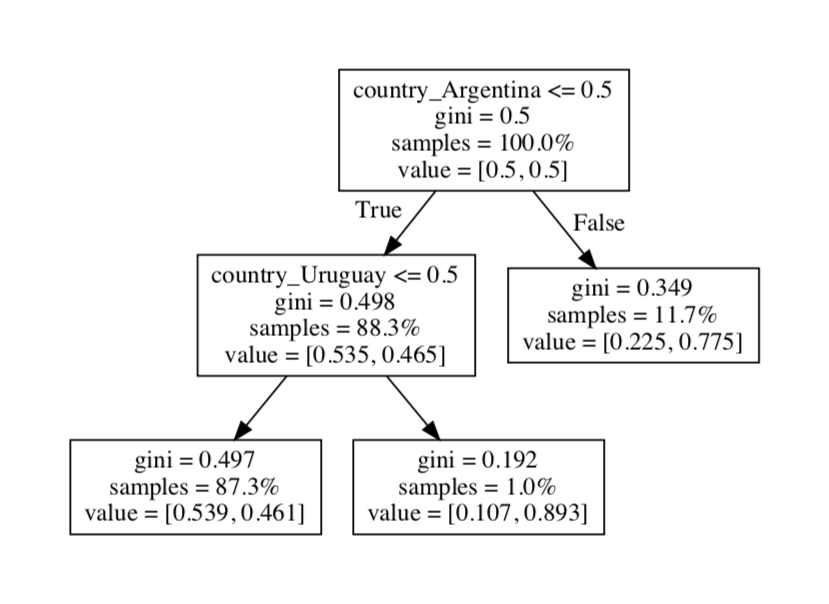

### Observation 6:
The model shows similar result with what was done before in the visualization part.  Country Argentina and Uruguay are the ones that affecting the test/control spliting.

# Future work
As we can see in the dataset, there is more than half of the value is missing in the ad_channel column, which is very suspicious.  Maybe there are some issues with collecting this information and there might be a certain parter that could be discovered.  However, for the purpose of these three problems proposed, I will not explore this right now.  After completing all the challenges, I will come back and see if there is more to discover.